In [2]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np
import tensorflow as tf

# seed값 설정
numpy.random.seed(3)
tf.random.set_seed(3)

# 데이터 입력
df = pd.read_csv('./datasets/Sonar.csv')

print(df.shape)
df.head()

(208, 61)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1


In [8]:
X = df.iloc[:, 0:60]
y = df.iloc[:, 60]

# 모델 설정
model = Sequential()
model.add(Dense(24, input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# 모델 실행
history = model.fit(X, y, epochs=200, batch_size=5)
# 결과 출력
print(f"\n Accuracy: {model.evaluate(X, y)[1]:.4f}")

Epoch 1/200
42/42 [==============================] - 1s 2ms/step - loss: 0.6795 - accuracy: 0.6202
Epoch 2/200
42/42 [==============================] - 0s 2ms/step - loss: 0.6547 - accuracy: 0.6779
Epoch 3/200
42/42 [==============================] - 0s 2ms/step - loss: 0.6364 - accuracy: 0.6635
Epoch 4/200
42/42 [==============================] - 0s 2ms/step - loss: 0.6102 - accuracy: 0.7212
Epoch 5/200
42/42 [==============================] - 0s 3ms/step - loss: 0.5863 - accuracy: 0.7500
Epoch 6/200
42/42 [==============================] - 0s 3ms/step - loss: 0.5675 - accuracy: 0.7500
Epoch 7/200
42/42 [==============================] - 0s 3ms/step - loss: 0.5379 - accuracy: 0.7885
Epoch 8/200
42/42 [==============================] - 0s 3ms/step - loss: 0.5134 - accuracy: 0.7644
Epoch 9/200
42/42 [==============================] - 0s 2ms/step - loss: 0.5002 - accuracy: 0.7692
Epoch 10/200
42/42 [==============================] - 0s 3ms/step - loss: 0.4804 - accuracy: 0.7740
Epoch 11/

In [14]:
result = history.history

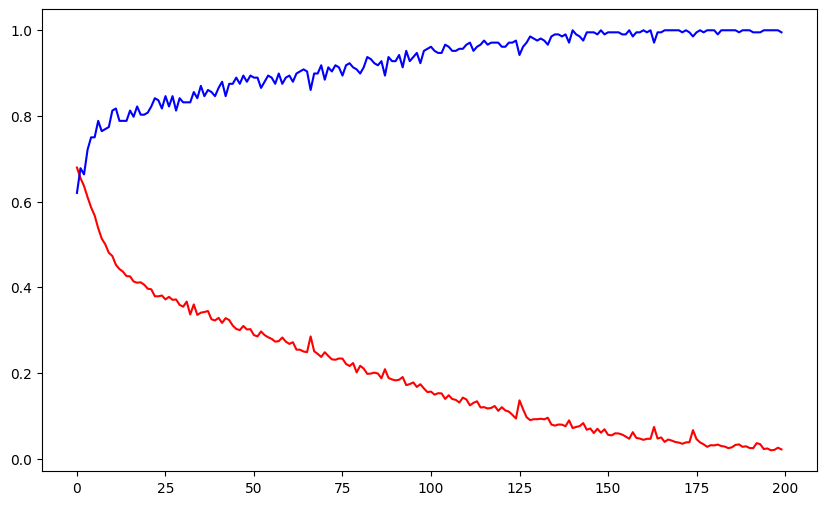

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(result['loss'], c='red', label='loss')
plt.plot(result['accuracy'], c='blue', label='accuaracy')

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
# 모델
model = Sequential()
model.add(Dense(24, input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])              
# fit
history = model.fit(X_train, y_train, epochs=200, batch_size=5)
# result
print(f"\n Accuracy: {model.evaluate(X_test, y_test)[1]:.4f}")

Epoch 1/200
29/29 [==============================] - 1s 3ms/step - loss: 0.6872 - accuracy: 0.5241
Epoch 2/200
29/29 [==============================] - 0s 3ms/step - loss: 0.6774 - accuracy: 0.5241
Epoch 3/200
29/29 [==============================] - 0s 2ms/step - loss: 0.6669 - accuracy: 0.5241
Epoch 4/200
29/29 [==============================] - 0s 3ms/step - loss: 0.6577 - accuracy: 0.5379
Epoch 5/200
29/29 [==============================] - 0s 2ms/step - loss: 0.6470 - accuracy: 0.5586
Epoch 6/200
29/29 [==============================] - 0s 4ms/step - loss: 0.6261 - accuracy: 0.5724
Epoch 7/200
29/29 [==============================] - 0s 2ms/step - loss: 0.6063 - accuracy: 0.7241
Epoch 8/200
29/29 [==============================] - 0s 2ms/step - loss: 0.5784 - accuracy: 0.7517
Epoch 9/200
29/29 [==============================] - 0s 2ms/step - loss: 0.5554 - accuracy: 0.7793
Epoch 10/200
29/29 [==============================] - 0s 3ms/step - loss: 0.5279 - accuracy: 0.7724
Epoch 11/

In [19]:
# 모델
model = Sequential()
model.add(Dense(24, input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])              
# fit
history = model.fit(X_train, y_train, epochs=120, batch_size=5)

model.save('my_model.h5')

Epoch 1/120
29/29 [==============================] - 1s 3ms/step - loss: 0.6985 - accuracy: 0.5034
Epoch 2/120
29/29 [==============================] - 0s 2ms/step - loss: 0.6817 - accuracy: 0.6000
Epoch 3/120
29/29 [==============================] - 0s 3ms/step - loss: 0.6743 - accuracy: 0.6000
Epoch 4/120
29/29 [==============================] - 0s 2ms/step - loss: 0.6668 - accuracy: 0.5862
Epoch 5/120
29/29 [==============================] - 0s 3ms/step - loss: 0.6568 - accuracy: 0.6345
Epoch 6/120
29/29 [==============================] - 0s 3ms/step - loss: 0.6404 - accuracy: 0.6345
Epoch 7/120
29/29 [==============================] - 0s 2ms/step - loss: 0.6190 - accuracy: 0.7241
Epoch 8/120
29/29 [==============================] - 0s 2ms/step - loss: 0.5915 - accuracy: 0.7448
Epoch 9/120
29/29 [==============================] - 0s 2ms/step - loss: 0.5669 - accuracy: 0.7655
Epoch 10/120
29/29 [==============================] - 0s 2ms/step - loss: 0.5411 - accuracy: 0.7448
Epoch 11/

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
from tensorflow.keras.models import load_model
model = load_model('my_model.h5')

In [23]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 16ms/step - loss: 0.3902 - accuracy: 0.8889


[0.39015382528305054, 0.8888888955116272]

In [ ]:
from sklearn.model_selection import StratifiedKFold
n_fold = 10
skf = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=42)
# 빈 accuracy 배열
accuracy = []
# 모델의 설정, 컴파일, 실행
for train, test in skf.split(X, y):
    model = Sequential()
    model.add(Dense(24, input_dim=60, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='', optimizer='adam', metrics=['accuracy'])              
    model.fit(X_train, y_train, epochs=100, batch_size=5)
    k_accuracy = f"{model.evaluate(X_test, y_test)[1]:.4f}"
    accuracy.append(k_accuracy)

# 결과 출력
print(f"{n_fold}fold accuracy:", accuracy)

Epoch 1/100
29/29 [==============================] - 1s 3ms/step - loss: 0.2500 - accuracy: 0.5310
Epoch 2/100
29/29 [==============================] - 0s 3ms/step - loss: 0.2438 - accuracy: 0.5655
Epoch 3/100
29/29 [==============================] - 0s 3ms/step - loss: 0.2388 - accuracy: 0.5793
Epoch 4/100
29/29 [==============================] - 0s 2ms/step - loss: 0.2341 - accuracy: 0.6138
Epoch 5/100
29/29 [==============================] - 0s 3ms/step - loss: 0.2304 - accuracy: 0.6345
Epoch 6/100
29/29 [==============================] - 0s 3ms/step - loss: 0.2238 - accuracy: 0.6345
Epoch 7/100
29/29 [==============================] - 0s 2ms/step - loss: 0.2191 - accuracy: 0.7241
Epoch 8/100
29/29 [==============================] - 0s 2ms/step - loss: 0.2135 - accuracy: 0.7241
Epoch 9/100
29/29 [==============================] - 0s 2ms/step - loss: 0.2082 - accuracy: 0.7379
Epoch 10/100
29/29 [==============================] - 0s 2ms/step - loss: 0.2010 - accuracy: 0.7310
Epoch 11/